- 練習創立 DataFrame
- 如何取出口數最多的國家

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

In [32]:
import pandas as pd
import numpy as np

data = {'國家':['Taiwan','United states','Thailand','United states'] ,
        '人口': np.random.randint(low=10000,high=100000,size=4)}
data = pd.DataFrame(data)
print(data)

              國家     人口
0         Taiwan  65707
1  United states  12149
2       Thailand  49212
3  United states  75424


### groupby

In [33]:
data.groupby(by="國家")['人口'].mean()

國家
Taiwan           65707.0
Thailand         49212.0
United states    43786.5
Name: 人口, dtype: float64

## 讀取 txt 檔
* 讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [34]:
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [35]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


&#39;n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2&#39;

In [36]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

split_data = data.split(split_tag)
print(len(split_data))
split_data[0]

9996


&#39;n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg&#39;

## 將 txt 轉成 pandas dataframe

In [37]:
import pandas as pd

arrange_data=[]
for i in split_data:
    url=i.split('\t')
    arrange_data.append(url)
 
df = pd.DataFrame(arrange_data)
df.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


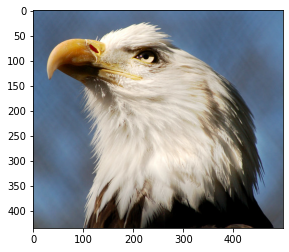

In [38]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.iloc[0,1]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [39]:
def img2arr_fromURLs(url_list, resize = False):
    """
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list=[]

    for url in url_list:
        response=requests.get(url)
        try:
            img = Image.open(BytesIO(response.content))
            if resize:
                img = img.resize((256,256)) # 假如 resize, 就先統一到 256 x 256
            #img = np.array(img)
            img_list.append(img)
        except:
            # 只有在 response.status_code 為 200 時，才可以取得圖片，
            # 若有 404 或其他 status code, 會碰到 Error, 所以我們用 Try 語法避開取不到的狀況
            pass 

    return img_list

Total images that we got: 4 


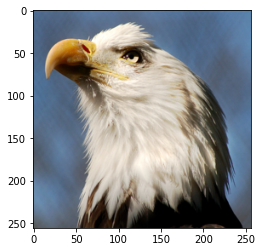

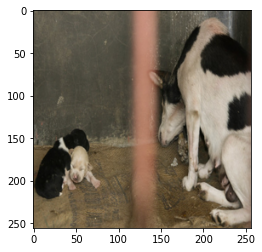

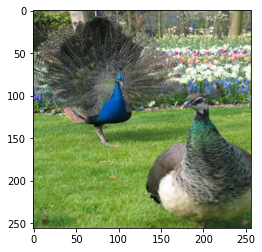

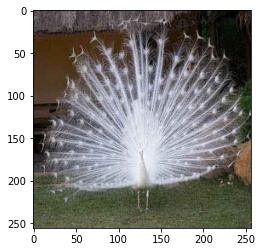

In [40]:
result = img2arr_fromURLs(df[0:5][1].values,True)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()